# Rendimiento de estudiantes durante examenes

Fuente de datos: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

## Carga de modulos

In [1]:
import pandas as pd
import numpy as np

import cufflinks as confleis

confleis.go_offline()

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
# Uso de memoria por parte del tipo de variables
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 303.7 KB


In [5]:
# Convertir columnas de tipo object a tipo category para optimizar el uso de memoria
columnas_a_convertir = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

for col in columnas_a_convertir:
    df[col] = df[col].astype("category")

In [6]:
# Podemos notar los siguientes cambios
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test preparation course      1000 non-null   category
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 30.1 KB


## Número de registros

In [7]:
# Ahora veremos la cantidad de valores distintos que tiene cada columna de tipo no númerica:
for col in df.select_dtypes(include='category').columns:
    valores_unicos = df[col].nunique()
    print(f"{col}: {valores_unicos}")

gender: 2
race/ethnicity: 5
parental level of education: 6
lunch: 2
test preparation course: 2


A continuación, se verán los distintos valores que toman cada columna y la cantidad de datos que contienen cada valor:

In [11]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [12]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [13]:
# Vemos la cantidad de valores ausentes en cada columna
df.isna().mean()

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

## 1. Influencia de almuerzo

Se hara el filtrado de datos para la prueba de Mann-whitney. Para ello, se seleccionaran todos los alumnos cuya preparación para el examen se completó. Se determinará si hay una diferencia entre las distribuciones de las calificaciones de alumnos con un lunch estándar y uno libre/reducido.

Notemos que hay un 64.2% de alumnos que no completaron su preparación. Por lo que, se hará la prueba para ambos casos, para que las pruebas contemplen las mismas condiciones en los alumnos.

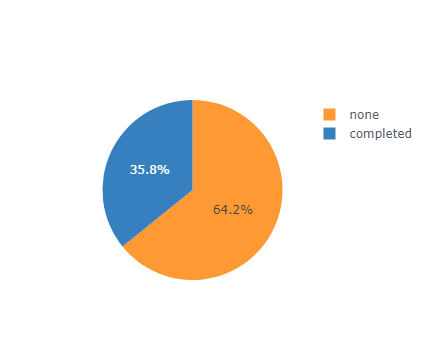

In [14]:
df["test preparation course"].value_counts().reset_index().iplot(kind="pie", labels="test preparation course", values="count")

In [15]:
df_1 = df[df["test preparation course"] == "completed"]

In [16]:
# Se eliminarán las siguientes columnas:
df_1.drop(columns=['gender', 'race/ethnicity', 'parental level of education', 'test preparation course'], inplace=True)

df_1

,lunch,math score,reading score,writing score
1,standard,69,90,88
6,standard,88,95,92
8,free/reduced,64,64,67
13,standard,78,72,70
18,free/reduced,46,42,46
...,...,...,...,...
990,free/reduced,86,81,75
991,standard,65,82,78
995,standard,88,99,95
997,free/reduced,59,71,65


In [60]:
# Se calcula el promedio obtenido en cada examen.
numeric_columns = df_1.select_dtypes(include=['number'])

# Calcular el promedio de los valores en cada fila
df_1['promedio'] = numeric_columns.mean(axis=1)

In [61]:
df_1

,lunch,math score,reading score,writing score,promedio
1,standard,69,90,88,82.333333
6,standard,88,95,92,91.666667
8,free/reduced,64,64,67,65.000000
13,standard,78,72,70,73.333333
18,free/reduced,46,42,46,44.666667
...,...,...,...,...,...
990,free/reduced,86,81,75,80.666667
991,standard,65,82,78,75.000000
995,standard,88,99,95,94.000000
997,free/reduced,59,71,65,65.000000


In [62]:
# Se eliminarán las columnas de los examenes para dejar unicamente la del promedio:
df_1.drop(columns=['math score', 'reading score', 'writing score'], inplace=True)

df_1

,lunch,promedio
1,standard,82.333333
6,standard,91.666667
8,free/reduced,65.000000
13,standard,73.333333
18,free/reduced,44.666667
...,...,...
990,free/reduced,80.666667
991,standard,75.000000
995,standard,94.000000
997,free/reduced,65.000000


Notemos que el 63.4% de los datos contienen alumnos con un lunch estándar:

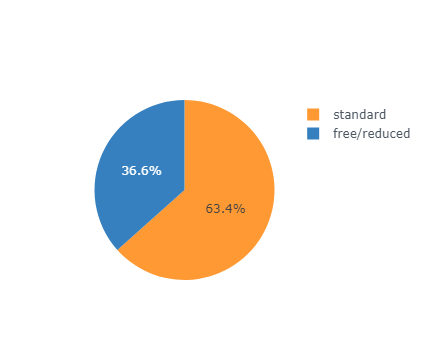

In [63]:
df_1["lunch"].value_counts().reset_index().iplot(kind="pie", labels="lunch", values="count")

Se toma una muestra aleatoria de alumnos con cada tipo de lunch:

In [80]:
# Para alumnos con lunch estandár:
df_1_Standard = df_1[df_1["lunch"] == "standard"].sample(100)
df_1_Standard.rename(columns={'promedio': 'prom_lunch_standard'}, inplace=True)
df_1_Standard = df_1_Standard.reset_index(drop=True)

In [81]:
# Para alumnos con lunch libre/reducido:
df_1_Free = df_1[df_1["lunch"] == "free/reduced"].sample(100)
df_1_Free.rename(columns={'promedio': 'prom_lunch_Free'}, inplace=True)
df_1_Free = df_1_Free.reset_index(drop=True)

In [82]:
PruebaMW = pd.concat([df_1_Standard['prom_lunch_standard'], df_1_Free['prom_lunch_Free']], axis=1)
PruebaMW

,prom_lunch_standard,prom_lunch_Free
0,72.666667,60.666667
1,91.333333,70.333333
2,91.666667,75.333333
3,66.000000,77.000000
4,80.666667,74.333333
...,...,...
95,83.666667,70.000000
96,90.000000,69.000000
97,74.666667,65.666667
98,65.666667,93.333333


In [83]:
PruebaMW.to_csv('PruebaMW.csv', index=False)